<h1><center><font color=purple> Logistic Regression </font></center></h1>

*This is just a start to practise logistic regression. The purpose is get to familiar how to use python and it's libary Sklearn to operate the data and build the module, then test and evaluate.*

*The data is going to be used is UCI credit card data, based on the feagues and predict a how much like a person will default the payment.*

                                                            -By Sophie on Jan 26, 2021

### Step 1: Import data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import and read file
df1 = pd.read_csv("UCI_Credit_Card.csv")
df1.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


*__The description of each column/variable can be seen below :__*

* ID: ID of each client
* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
* SEX: Gender (1=male, 2=female)
* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* MARRIAGE: Marital status (1=married, 2=single, 3=others)
* AGE: Age in years
* PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
* PAY_2: Repayment status in August, 2005 (scale same as above)
* PAY_3: Repayment status in July, 2005 (scale same as above)
* PAY_4: Repayment status in June, 2005 (scale same as above)
* PAY_5: Repayment status in May, 2005 (scale same as above)
* PAY_6: Repayment status in April, 2005 (scale same as above)
* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
* default.payment.next.month: Default payment (1=yes, 0=no)

In [3]:
# Check row, column, missing value, datatype.
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

*__I can see this data has 30000 entries, no missing value and datatype in right type.__*

### Step 2: Explore the data

In [4]:
# Check the overall statistic number for each column
df1.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [5]:
# Since target variable "default" column is only have input 1(default) and 0(not default), so here check how many for each.
df1["default.payment.next.month"].value_counts()

0    23364
1     6636
Name: default.payment.next.month, dtype: int64

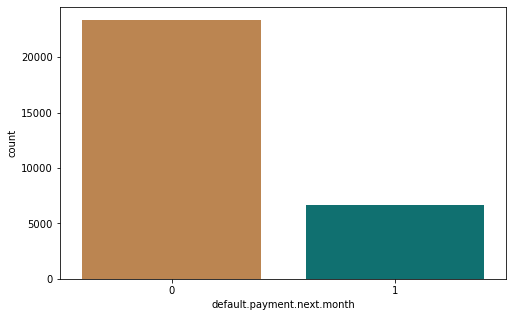

In [6]:
# Visualize the number of default vs number of no-default
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df1, x="default.payment.next.month", palette={"teal", "peru"})

In [7]:
# Check the correalation between default and other variables
df1.corr()["default.payment.next.month"].sort_values()

LIMIT_BAL                    -0.153520
PAY_AMT1                     -0.072929
PAY_AMT2                     -0.058579
PAY_AMT4                     -0.056827
PAY_AMT3                     -0.056250
PAY_AMT5                     -0.055124
PAY_AMT6                     -0.053183
SEX                          -0.039961
MARRIAGE                     -0.024339
BILL_AMT1                    -0.019644
BILL_AMT2                    -0.014193
BILL_AMT3                    -0.014076
ID                           -0.013952
BILL_AMT4                    -0.010156
BILL_AMT5                    -0.006760
BILL_AMT6                    -0.005372
AGE                           0.013890
EDUCATION                     0.028006
PAY_6                         0.186866
PAY_5                         0.204149
PAY_4                         0.216614
PAY_3                         0.235253
PAY_2                         0.263551
PAY_0                         0.324794
default.payment.next.month    1.000000
Name: default.payment.nex

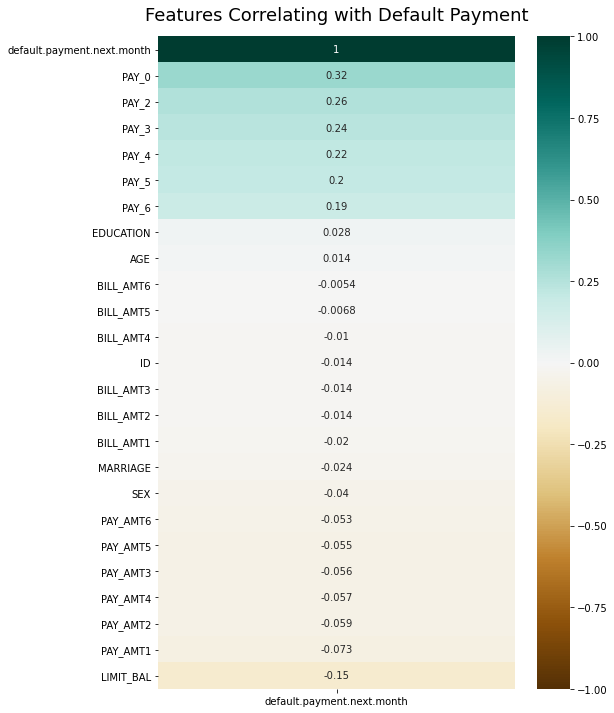

In [8]:
# Visualize the correlation between default and others
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df1.corr()[['default.payment.next.month']].sort_values(by='default.payment.next.month', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Default Payment', fontdict={'fontsize':18}, pad=16);

*__By looking above correlation, I can see among all variables, "PAY_0 to PAY_6" has stronger positive relation with default result and "LIMIT_BAL" has stronger negative relation with default result.__*

### Step 3: Split data for logistic regression

In [9]:
# Split data into two, X: features include colum 2 to 24(discard column ID), Y: target column 25 
X = df1.drop(["ID", "default.payment.next.month"], axis=1)
y = df1["default.payment.next.month"]
#X.head()

In [10]:
from sklearn.model_selection import train_test_split #import package for train/test data split
from sklearn.preprocessing import StandardScaler #import package for scaler

In [11]:
# Split X, y into one portion for train and one portion for test on ratio 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [12]:
# Scale the X train set with fit transform and X test set without fit
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

### Step 4: Create and test logistc regression model
* Will use scikit-learn to create the bodule

In [13]:
from sklearn.linear_model import LogisticRegression #import module package

In [14]:
# Find better parameters for class_weight of module due to our imbalanced data
from sklearn.model_selection import GridSearchCV
class_weight = np.linspace(0.05, 1.5, 20)
grid_para = {'class_weight' : [{0: x, 1: 1.0-x} for x in class_weight]}
gridsearch = GridSearchCV(estimator = LogisticRegression(), param_grid = grid_para, scoring = 'f1', cv = 3)
gridsearch.fit(scaled_X_train, y_train)
print(gridsearch.best_params_)

{'class_weight': {0: 0.2789473684210526, 1: 0.7210526315789474}}


In [15]:
# Create module
Log_model = LogisticRegression(class_weight = {0: 0.2789473684210526, 1: 0.7210526315789474})

In [16]:
# fit module with Scaled_X_train data and y train data
Log_model.fit(scaled_X_train, y_train)

LogisticRegression(class_weight={0: 0.2789473684210526, 1: 0.7210526315789474})

In [17]:
Log_model.coef_

array([[-0.09672275, -0.05469881, -0.08700526, -0.08849909,  0.08111835,
         0.59839305,  0.10412597,  0.08010524,  0.03627411,  0.03197068,
        -0.00628521, -0.34052301,  0.10312491,  0.12415933, -0.02031394,
         0.02236153,  0.01870326, -0.19188836, -0.27540291, -0.03700965,
        -0.03834197, -0.05737804, -0.03248589]])

In [18]:
# Test the model
y_pred = Log_model.predict(scaled_X_test)

### Step 5: Evaluate model's accuracy (quantify and visulize)
* will look following scores and matric
  - Accuracy score
  - Precision score
  - Recall score
  - Confusion matrix
* will also plot:
  - ROC curve
  - Precision/Recall curve

In [19]:
# Import accuracy tools from Sklearn
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, log_loss

In [20]:
accuracy_score(y_test, y_pred)

0.793

*__This score 0.793 means model can predict 79% right. However in some case the accuracy score can fool us, so we must check other score and matric, like confusion matric, precision_score or recall score.__*

In [21]:
confusion_matrix(y_test, y_pred)

array([[4132,  558],
       [ 684,  626]])

*__This matrix means the model made 4132 TN, 684 FN, 558 FP and 616 TP__*

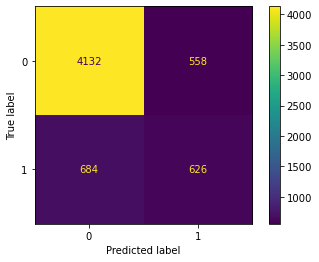

In [22]:
# Visulize the confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(Log_model, scaled_X_test, y_test)

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      4690
           1       0.53      0.48      0.50      1310

    accuracy                           0.79      6000
   macro avg       0.69      0.68      0.69      6000
weighted avg       0.79      0.79      0.79      6000



In [24]:
precision_score(y_test, y_pred)

0.5287162162162162

*__Precision score means how many true positive(TP) from total predicted positive (TP+FP). 0.52 means the model can predit 52 positive from total 100 predict positive__*

In [25]:
recall_score(y_test, y_pred)

0.4778625954198473

*__Recall score means how many true positive(TP) from actual positive(TP+FN). 0.48 means the model can predit 48 positive from total 100 actual positive__*

In [26]:
log_loss(y_test, y_pred)

7.14960107630752

*__Log loss cindicate how likely does the model think the actually observed set of outcomes was. lower is better. Number 7.14 is not good__*

In [27]:
# Visualize the accuracy 
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve

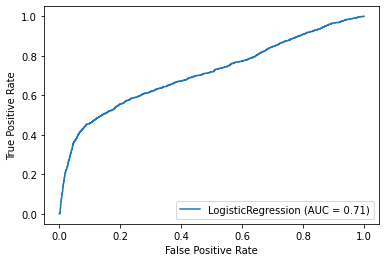

In [28]:
plot_roc_curve(Log_model, scaled_X_test, y_test)

*__ROC curve (Reciever Operator Characteristic), AUC is Area under the Curve. The perfect model should have AUC is 1. This model AUC is 0.71.__*

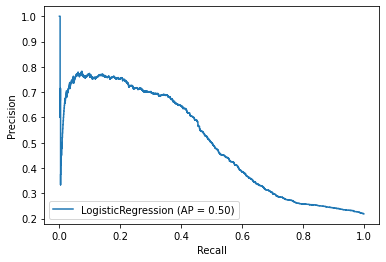

In [29]:
plot_precision_recall_curve(Log_model, scaled_X_test, y_test)

*__This curve precision vs recall curve has similar function as ROC curve. Under under the line bigger is better.__*

<font color=purple>__Conclution:  Even though the model accuracy score 0.793, but after checking confustion matrix,  precision_score, recall score and looking the ROC curve.. The model seems not good enough. Maybe should try use other regression.__</font>

### Use the model to predict a person with some fake data I made. (only a try)

In [30]:
# Create a person with following data
person1=[[1000, 2, 2, 1, 30, 2, 2, 2, -1, -1, -1, 3000, 3000, -3000, 3000, 100, 3000, 1000, -10000, 1000, -1000, 1000, 1000]]

In [31]:
# Use the model predict the probability of he/she defaults payment.
Log_model.predict_proba(scaler.transform(person1))

array([[0.21513807, 0.78486193]])

In [32]:
# Use the model predict if person1 defaults the payment or not
Log_model.predict(scaler.transform(person1))

array([1])

### End